In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import re

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
sns.set(style='whitegrid')

In [6]:
df_train = pd.read_csv("twitter_training.csv", header=None)
df_valid = pd.read_csv("twitter_validation.csv", header=None)

In [7]:
columns = ['id', 'entity', 'sentiment', 'content']
df_train.columns = columns
df_valid.columns = columns

In [8]:
df = pd.concat([df_train, df_valid], ignore_index=True)

In [9]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove non-letters
    text = text.lower().strip()
    return text

df['clean_content'] = df['content'].astype(str).apply(clean_text)

In [10]:
print("Sentiment distribution:\n", df['sentiment'].value_counts())
print("\nTop entities:\n", df['entity'].value_counts().head(10))

Sentiment distribution:
 sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64

Top entities:
 entity
TomClancysRainbowSix         2435
LeagueOfLegends              2431
MaddenNFL                    2429
Microsoft                    2428
CallOfDuty                   2425
Verizon                      2414
ApexLegends                  2412
CallOfDutyBlackopsColdWar    2403
Facebook                     2403
WorldOfCraft                 2394
Name: count, dtype: int64


C:\Users\Atharva\AppData\Local\Temp\ipykernel_23740\1513805016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel', order=df['sentiment'].value_counts().index)


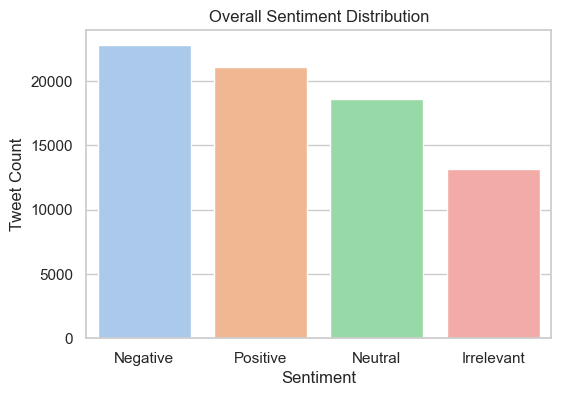

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='pastel', order=df['sentiment'].value_counts().index)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

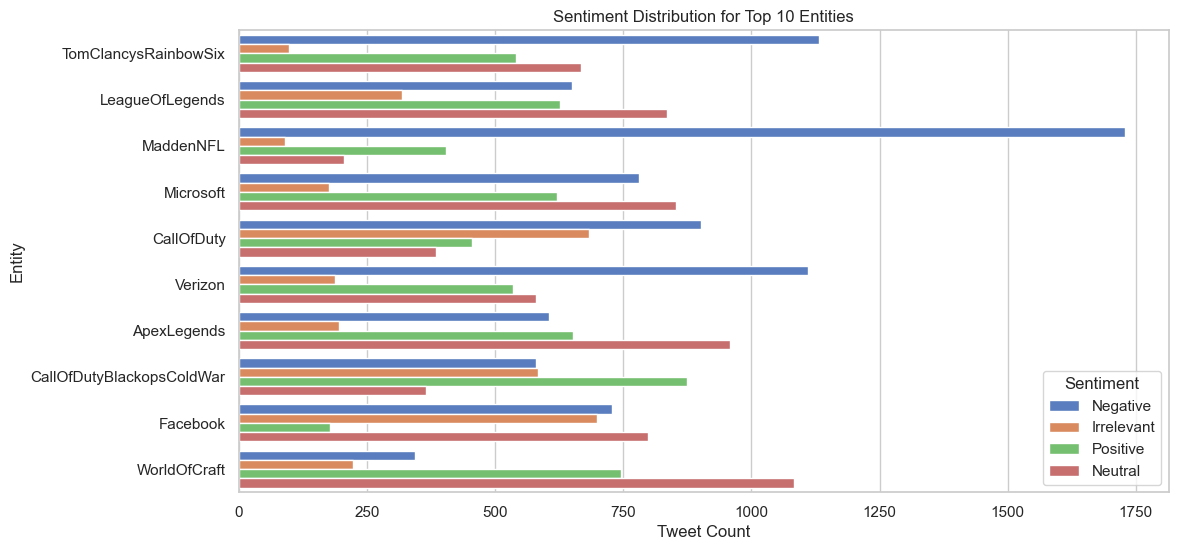

In [12]:
top_entities = df['entity'].value_counts().head(10).index.tolist()
top_df = df[df['entity'].isin(top_entities)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_df, y='entity', hue='sentiment', order=top_entities, palette='muted')
plt.title("Sentiment Distribution for Top 10 Entities")
plt.xlabel("Tweet Count")
plt.ylabel("Entity")
plt.legend(title='Sentiment')
plt.show()

In [15]:
def get_top_words(entity, sentiment, n=10):
    subset = df[(df['entity'] == entity) & (df['sentiment'] == sentiment)]
    if subset.empty:
        print(f"No data for entity '{entity}' with sentiment '{sentiment}'")
        return []
    
    words = " ".join(subset['clean_content']).split()
    filtered = [w for w in words if w not in custom_stopwords]
    return Counter(filtered).most_common(n)

In [29]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'rt', 'via', 'amp',
    'game', 'games', 'play', 'player', 'one', 'get', 'like', 'new', 'make', 'time', 'would',
])

C:\Users\Atharva\AppData\Local\Temp\ipykernel_23740\2949786747.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


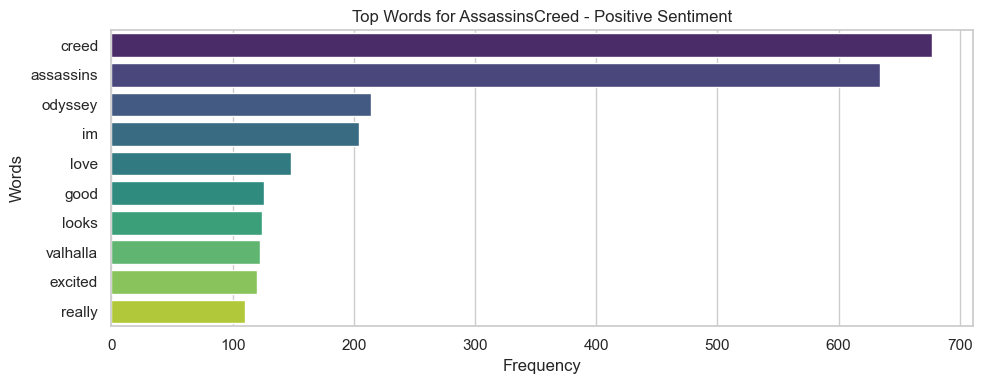

In [30]:
entity_name = 'AssassinsCreed'
sentiment_label = 'Positive'

top_words = get_top_words(entity_name, sentiment_label)

if top_words:
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Top Words for {entity_name} - {sentiment_label} Sentiment")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


AssassinsCreed - Positive sentiment


C:\Users\Atharva\AppData\Local\Temp\ipykernel_23740\1442610467.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


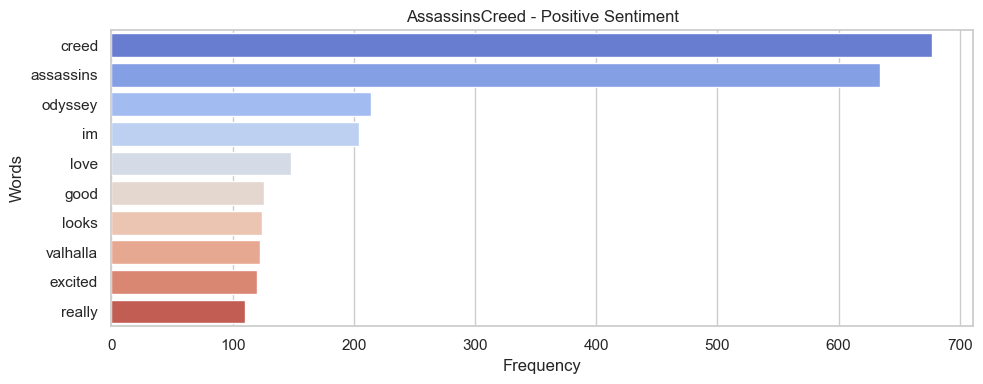


Borderlands - Positive sentiment


C:\Users\Atharva\AppData\Local\Temp\ipykernel_23740\1442610467.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


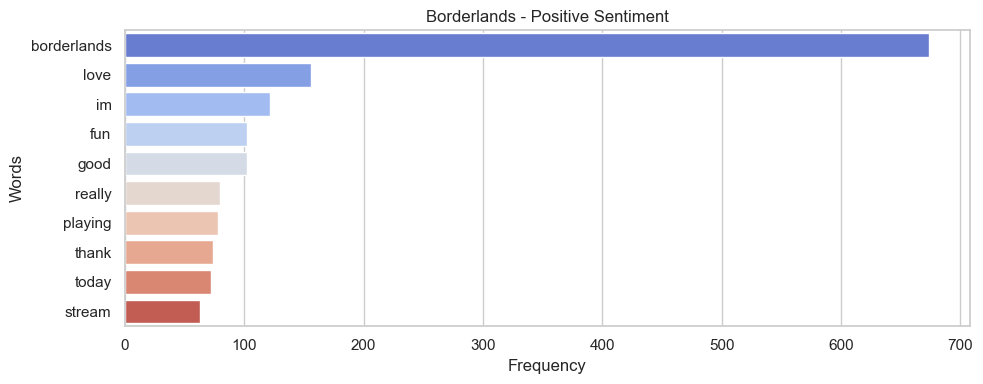


Cyberpunk2077 - Positive sentiment


C:\Users\Atharva\AppData\Local\Temp\ipykernel_23740\1442610467.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


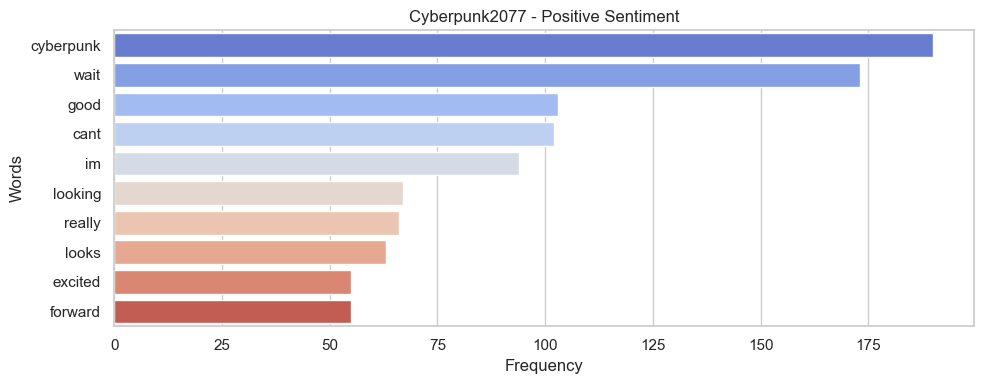


PlayStation5(PS5) - Positive sentiment


C:\Users\Atharva\AppData\Local\Temp\ipykernel_23740\1442610467.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


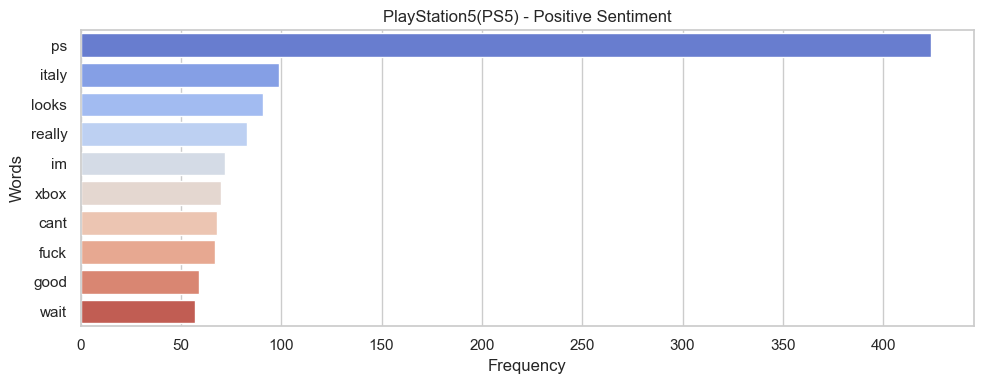


RedDeadRedemption(RDR) - Positive sentiment


C:\Users\Atharva\AppData\Local\Temp\ipykernel_23740\1442610467.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


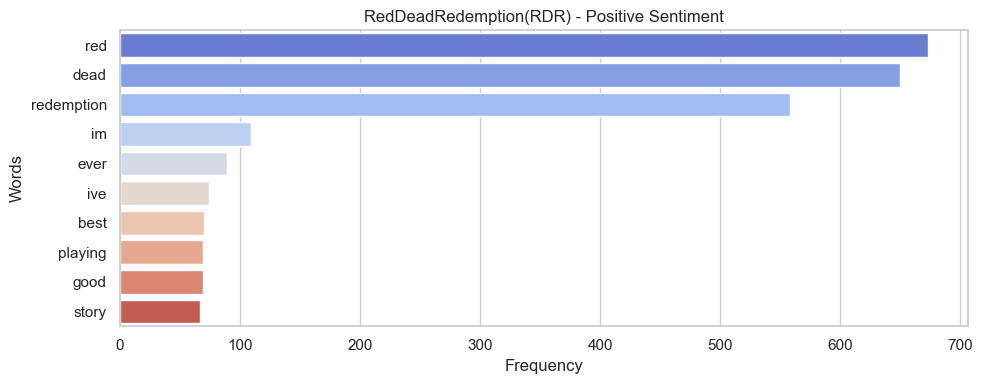

In [33]:
sentiment_filter = 'Positive'
top_entities = df[df['sentiment'] == sentiment_filter]['entity'].value_counts().head(5).index.tolist()

for entity in top_entities:
    print(f"\n{entity} - {sentiment_filter} sentiment")
    top_words = get_top_words(entity, sentiment_filter)
    if top_words:
        words, counts = zip(*top_words)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
        plt.title(f"{entity} - {sentiment_filter} Sentiment")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.tight_layout()
        plt.show()